### A. 데이터 읽어오기

In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A
csv_path = "NFLX.csv"
df = pd.read_csv(csv_path, usecols = range(0,5))
df

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


### B. 데이터 전처리 - 2021년 이후의 종가 데이터 출력하기

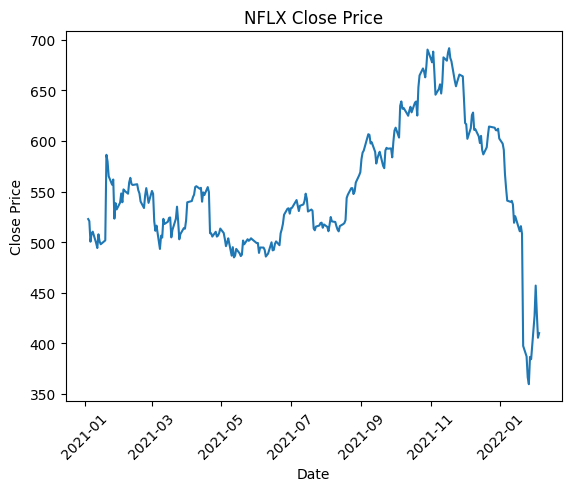

In [254]:
df['Date'] = pd.to_datetime(df['Date'])

df_after_2021 = df[df['Date'] >= "2021-01-01"]

plt.plot(df_after_2021['Date'], df_after_2021['Close'])

plt.title('NFLX Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')

# x축 45도 회전
plt.xticks(rotation=45)

plt.show()

### C. 데이터 분석 - 2021년 이후 최고, 최저 종가 출력하기

In [255]:
max_price = df_after_2021['Close'].max()
min_price = df_after_2021['Close'].min()
print(f'최고 종가: {max_price}')
print(f'최저 종가: {min_price}')

최고 종가: 691.690002
최저 종가: 359.700012


### D. 데이터 분석 - 2021년 이후 월 별 평균 종가 출력하기

C:\Users\User\AppData\Local\Temp\ipykernel_9992\2369056140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2021['Date'] = pd.to_datetime(df_after_2021['Date'])


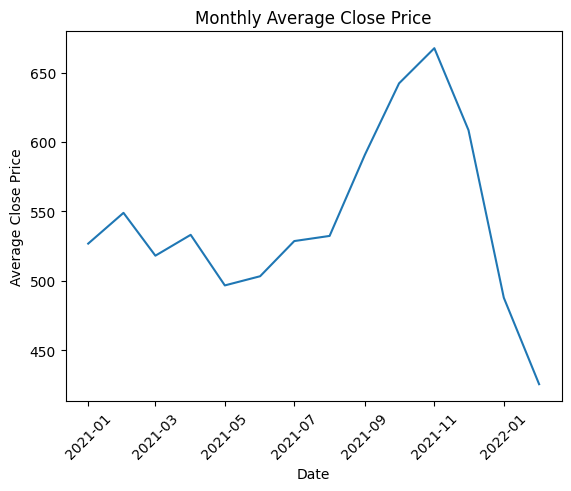

In [256]:

df_after_2021['Date'] = pd.to_datetime(df_after_2021['Date'])

df_grouped = df_after_2021.groupby(df['Date'].dt.to_period('M')).mean(numeric_only = True)

# print(df_grouped)

# 행이 변경 되었으므로, 다시 변경
df_grouped.reset_index(inplace=True)

# datetime으로 변환
df_grouped['Date'] = df_grouped['Date'].dt.to_timestamp()

plt.plot(df_grouped['Date'], df_grouped['Close'])

plt.title('Monthly Average Close Price')
plt.xlabel('Date')
plt.ylabel('Average Close Price')

# x축 45도 회전
plt.xticks(rotation=45)

plt.show()




### E. 데이터 시각화 - 2022년 이후 최고, 최저, 종가 시각화하기

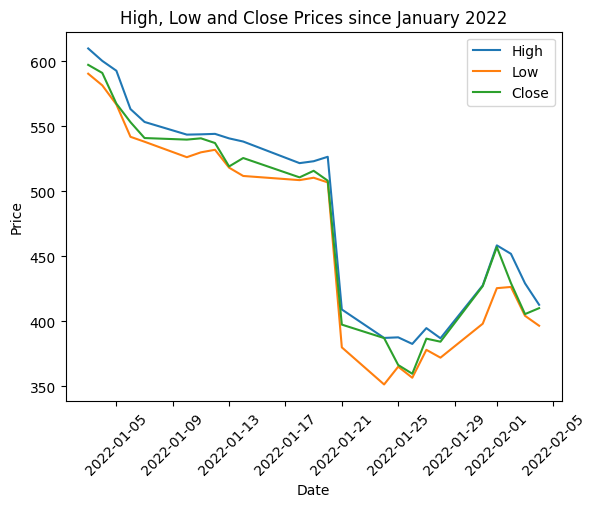

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv_path = "NFLX.csv"
df2 = pd.read_csv(csv_path, usecols = ['Date', 'High', 'Low', 'Close'])

df2['Date'] = pd.to_datetime(df2['Date'])

filtered_df = df2[df2['Date'] >= "2022-01-01"]

plt.plot(filtered_df['Date'], filtered_df['High'], label = 'High')
plt.plot(filtered_df['Date'], filtered_df['Low'], label = 'Low')
plt.plot(filtered_df['Date'], filtered_df['Close'], label = 'Close')

plt.title('High, Low and Close Prices since January 2022')
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend()

# x축 45도 회전
plt.xticks(rotation=45)

plt.show()
